# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *

PRINT = False

### Datos del Grafo

In [2]:
def fillMatrixEJ3():
    mat = MatrizRala(11,11)
    # CITAS A-0
    mat[0,2] = 1
    mat[0,3] = 1
    mat[0,4] = 1

    # CITAS B-1
    mat[1,0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4
    mat[4,10] = 1

    # CITAS F-5
    mat[5,0] = 1
    mat[5,6] = 1

    # CITAS G-6
    mat[6,7] = 1
    mat[6,8] = 1

    # CITAS H-7
    mat[7,8] = 1

    # CITAS I-8
    mat[8,5] = 1

    # CITAS J-9
    mat[9,8] = 1
 

    # CITAS K-10

    return mat

Crear las matrices $\mathbf{W}$ y $\mathbf{D}$ para la  utilizando la clas MatrizRala

In [3]:
W = fillMatrixEJ3()
D = W.getD()

if(PRINT):
    print(W,D)

MatrizRala([ 
    [ 0  0  1  1  1  0  0  0  0  0  0  ]
    [ 1  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  1  ]
    [ 1  0  0  0  0  0  1  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  1  1  0  0  ]
    [ 0  0  0  0  0  0  0  0  1  0  0  ]
    [ 0  0  0  0  0  1  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  1  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
]) MatrizRala([ 
    [ 0.3333333333333333  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  1.0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  1.0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0.5  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0.5  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  1.0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  1.0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  1.0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
])


In [11]:
# Wt = W.t()
if(PRINT):
    print(W)
    # print(D)
    print(W @ W)

MatrizRala([ 
    [ 0  0  1  1  1  0  0  0  0  0  0  ]
    [ 1  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  1  ]
    [ 1  0  0  0  0  0  1  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  1  1  0  0  ]
    [ 0  0  0  0  0  0  0  0  1  0  0  ]
    [ 0  0  0  0  0  1  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  1  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
])
 Progreso: 100.0%MatrizRala([ 
    [ 0  0  0  0  0  0  0  0  0  0  1  ]
    [ 0  0  1  1  1  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  1  1  1  0  0  1  1  0  0  ]
    [ 0  0  0  0  0  1  0  0  1  0  0  ]
    [ 0  0  0  0  0  1  0  0  0  0  0  ]
    [ 1  0  0  0  0  0  1  0  0  0  0  ]
    [ 0  0  0  0  0  1  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
])


Para expresar la ecuación como un sistema lineal $Ax = b$, primero necesitamos reorganizarla. Dado que $p^*$ es el vector de probabilidades que queremos encontrar, podemos escribir la ecuación como:

$p^* = \frac{1 - d}{N} \mathbf{1} + d \mathbf{W}\mathbf{D}p^*$

donde:
- $\mathbf{1}$ es un vector de unos de tamaño $Nx1$.
- $\mathbf{W}$ es la matriz que indica que paper cito al otro.
- $\mathbf{D}$ es la matriz diagonal que contiene la probabilidad dada que un paper sea citado en algun paper dado.
- $d$ probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
- $N$ es la cantidad de papers

Ahora, podemos reorganizar esta ecuación para obtener:

$p^* - d \mathbf{W}\mathbf{D}p^* = \frac{1 - d}{N} \mathbf{1}$

$p^* \left(\mathbf{I} - d \mathbf{W}\mathbf{D}\right) = \frac{1 - d}{N} \mathbf{1}$


Ahora, podemos expresar esto como un sistema lineal $Ax = b$, donde:
- $A = I - d\mathbf{W}\mathbf{D}$, siendo $I$ la matriz identidad.
- $x = p^*$.
- $b = \frac{1 - d}{N} \mathbf{1}$.

Esta es la forma en que podemos expresar la ecuación como un sistema lineal. Ahora, podemos utilizar métodos numéricos para resolver este sistema y encontrar el vector de probabilidades $p^*$.


Si el sistema converge, encontraremos un vector de probabilidades p∗ con matrices ralas. Expresar la ecuacion como un sistema lineal (Ax = b) y resolver para p∗ utilizando d = 0, 85

In [5]:
# PARAMETROS
d = 0.85
N = W.shape[0]
I = MatrizRala.One(N)

# A, b, 1
A = I -  d * W @ D #(d*(np.dot(W,D)))
vector_1 = MatrizRala.getVectorOne(N)
b = MatrizRala.getVectorOne(N) * ((1-d)/N)


# Metodo gauss
gaussJordan_sol = GaussJordan(A,b)

# Metodo Matriz Inversa
invA = A.inversa()
inversa_sol = invA @ b

if(PRINT):
    # print("Solucion Gauss Jordan:")
    # print(gaussJordan_sol)

    # print("Solucion Matriz Inversa:")
    # print(inversa_sol)

    print("Diferencias")
    print(gaussJordan_sol - inversa_sol)


 Progreso: 100.0%Diferencias%%
MatrizRala([ 
    [ 0  ]
    [ 0  ]
    [ 0  ]
    [ 0  ]
    [ 0  ]
    [ 0.00716541296959794  ]
    [ 0.016859795222583407  ]
    [ 0.009113402823018063  ]
    [ 0.010721650380021243  ]
    [ 0.009113402823018056  ]
    [ 0  ]
])


Comparar el resultado obtenido con el metodo iterativo utilizando una distribucion equiprobable para la probabilidad inicial. Para realizar la comparaci´on, graficar la diferencia absoluta entre $p_{t}$ y $p^*$ para valores de t hasta ver que converge.

### Metodo Iterativo

$p_{t+1} = \frac{1 - d}{N} \mathbf{1} + d \mathbf{W}\mathbf{D}p_{t}$

In [6]:
#calculo utilizando metodo iterativo 

# Vector de probabilidades inicial con distribución equiprobable
p = MatrizRala.getVectorOne(W.shape[0]) * (1/W.shape[0])
    
vector_unos = MatrizRala.getVectorOne(W.shape[0])
    
# Método iterativo
TOLERANCIA = 0.000001
MAX_ITER = 100
diferenciasT = []
diferenciasSol = []

# Calculos Previos
dWD = d * W @ D
constante_term_1 = (1 - d) / N
termino_1 = constante_term_1 * vector_unos

tiempo = 0

for t in range(MAX_ITER):
    # p_previo = p.__copy__()
    
    dWDP_t = dWD @ p
    next_p = termino_1 + dWDP_t
    
    # Calcular la diferencia absoluta entre p y p*
    deltaT = MatrizRala.diffVectors(next_p,p)
    dif_vectSol = MatrizRala.diffVectors(next_p,gaussJordan_sol)
    
    diferenciasT.append(deltaT)
    diferenciasSol.append(dif_vectSol)

    p = next_p
    
    if deltaT < TOLERANCIA:
        print(f"Convergencia alcanzada en la iteración {t + 1}.")
        print("Resultado")
        print(p)
        break



    

 Progreso: 100.0%Convergencia alcanzada en la iteración 33.
Resultado
MatrizRala([ 
    [ 0.02522727272727273  ]
    [ 0.020784090909090912  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.0567335356759534  ]
    [ 0.08458663284993453  ]
    [ 0.04572244268812054  ]
    [ 0.037748201094782274  ]
    [ 0.04572244268812054  ]
    [ 0.01363636363636364  ]
])


## Graficos

In [7]:
def build_graph(rangex:int, y_axis:list,title:str = 'Convergencia del Método Iterativo'):
    """Toma un valor y una lista y genera un grafico

    Args:
        rangex (int): Canitdad de iteraciones
        y_axis (list): Un vector que lleva las diferencias entre p y pt
    """
    # Graficar la diferencia absoluta vs. t
    plt.figure()
    plt.plot(range(rangex), y_axis, label='Diferencia Absoluta')
    plt.xlabel('Iteraciones (t)')
    plt.ylabel('Diferencia Absoluta')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show() 
    


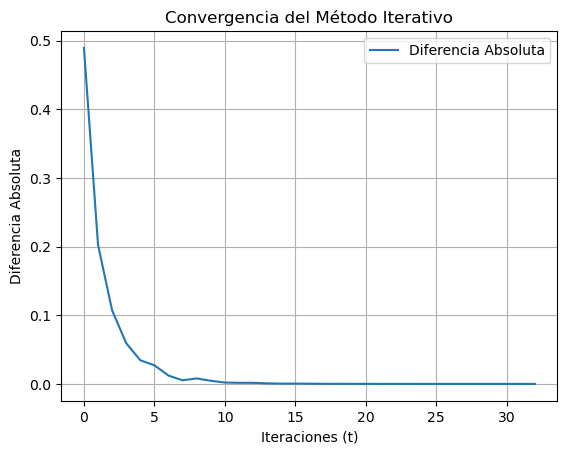

In [8]:
build_graph(len(diferenciasT),diferenciasT)

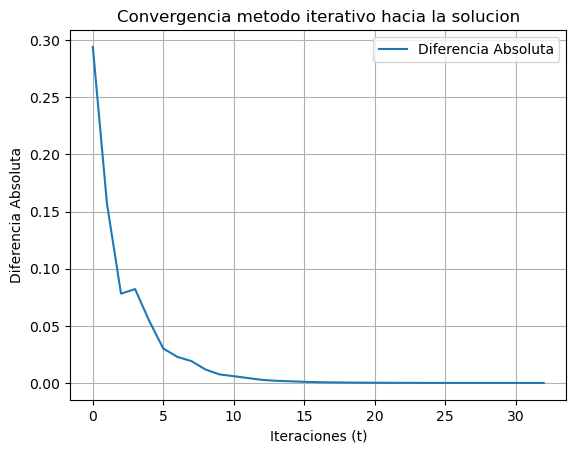

In [9]:
build_graph(len(diferenciasSol),diferenciasSol,"Convergencia metodo iterativo hacia la solucion")

# FIN EJ3

# Tests Rapidos

In [10]:
vector = MatrizRala.getVectorOne(10)
for i in range(10):
    vector[i,0] = i
# print(vector)
vectorNumpy = vector.toNumpy()
# ordenar de mayor a menor
argSort = np.argsort(vectorNumpy, axis=0)[::-1]# ordena de mayor a menor
vectorNumpy = np.sort(vectorNumpy, axis=0)[::-1]

# print(argSort)

vectorNumpy
vectorRala = MatrizRala.fromNumpy(vectorNumpy)
print(vectorRala)

MatrizRala([ 
    [ 9.0  ]
    [ 8.0  ]
    [ 7.0  ]
    [ 6.0  ]
    [ 5.0  ]
    [ 4.0  ]
    [ 3.0  ]
    [ 2.0  ]
    [ 1.0  ]
    [ 0.0  ]
])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *
import itertools
papers = 'papers/papers.csv'
citas = 'papers/citas.csv'
citas2 = 'papers/citas2.csv'

W = MatrizRala.getW(papers,citas)

N: = 629814


In [12]:
Wt = W.t()

## W D y Paralelismo

In [13]:
from multiprocess import Manager,Pool,cpu_count
import sys
sys.setrecursionlimit(22000)  
def dividir_diccionario(dic, n):
    """Divide el diccionario en n partes aproximadamente iguales."""
    print(f"CANT KEYS: {len(dic.keys())}")
    it = iter(dic)
    tamaño = len(dic)
    tamaño_parte = tamaño // n + (tamaño % n > 0)  # Determina el tamaño de cada parte, ajustando para que sean aproximadamente iguales
    partes = []
    for i in range(n):
        # Toma una porción del tamaño calculado del iterador
        parte = {k: dic[k] for k in itertools.islice(it, tamaño_parte)}
        partes.append(parte)
    return partes

def procesar_fragmento_diccionario(shared_dict,fragmento):
    # Supongamos que queremos contar cuántos valores cumplen cierta condición
    contador = 0
    for key in fragmento.keys():
        contador = 0
        fila = fragmento[key]
        nodo = fila.raiz
        while nodo:
            if(nodo.valor[1] == 1):
                contador += 1
            nodo = nodo.siguiente
        # Agregar contador a la matriz: mat_D[key,key] = contador
        if(contador != 0):
            shared_dict[key] = 1/contador
    
    #     if cumple_condicion(value):  # Define tu propia condición
    #         contador += 1
    # return contador

def D_with_readCsvMultithread(W):
    n_cpu = cpu_count()
    m,n = W.shape
    
    chunks: list = dividir_diccionario(W.filas,n_cpu)
    D = MatrizRala(m,n)
    for chunk in chunks:
        print(len(chunk))
    with Manager() as manager:
        print("LLEGUE")
        shared_dict = manager.dict()
        with Pool(n_cpu) as pool:
            pool.starmap(procesar_fragmento_diccionario,[(shared_dict,chunks[i]) for i in range(len(chunks))])
        
        for key, value in shared_dict.items():
            D[key,key] = value
    return D

D = D_with_readCsvMultithread(W)



CANT KEYS: 147944
18493
18493
18493
18493
18493
18493
18493
18493
LLEGUE


In [14]:
i = 629634
fila_i = D.filas[i]
print(fila_i)
len(D.filas.keys())

KeyError: 629634

In [ ]:




top_10 = np.zeros(10)
top_10_index = np.zeros(10, dtype=float)

for i in range(W.shape[0]):
    v = D[i,i]
    if v > top_10[0]:  # Si v es mayor que el más pequeño en top_10
        top_10[0] = v
        top_10_index[0] = i
        sort_indices = np.argsort(top_10)  # Ordena y obtiene índices
        top_10 = top_10[sort_indices]  # Reordena top_10
        top_10_index = top_10_index[sort_indices]  # Reordena los índices de acuerdo a top_10

print(top_10,"\n",top_10_index)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
 [141. 135.  90.  86.  76.  58.  35.  26.  21.  12.]


In [ ]:
fila_max = W.filas[top_10_index[-1]]
contador = 0
nodo = fila_max.raiz
while nodo:
    contador += 1
    nodo = nodo.siguiente
print(contador)

In [ ]:
i = 629634 + 1
# fila_i = D.filas[i]
# print(fila_i)
# len(D.filas.keys())
i in W.filas.keys()

False

In [ ]:
from matricesRalas import *

A = MatrizRala(3,3)
A[0,0] = 1
A[0,0]

1